In [9]:
import pandas as pd

%matplotlib inline

In [10]:
data = pd.read_excel('../data/Testcase_dataset-IBPEM.xlsx')

In [18]:
data.head(12*24+1)

,Date,Time,CWRT_syth,HLI Entering CHW Temp
0,2019-01-13,0000h,31.090000,NaN
1,2019-01-13,0005h,31.106000,NaN
2,2019-01-13,0010h,31.129999,10.600000
3,2019-01-13,0015h,31.146000,NaN
4,2019-01-13,0020h,31.170000,NaN
5,2019-01-13,0025h,31.190000,10.700000
6,2019-01-13,0030h,31.219999,NaN
7,2019-01-13,0035h,31.219999,NaN
8,2019-01-13,0040h,31.236000,10.900001
9,2019-01-13,0045h,31.276000,NaN


## Process date and time

In [28]:
data['timestamp'] = pd.to_datetime({
    'year': data['Date'].str.split('-').str.get(0), 
    'month': data['Date'].str.split('-').str.get(1), 
    'day': data['Date'].str.split('-').str.get(2), 
    'hour':data['Time'].str.slice(0, 2), 
    'minute': data['Time'].str.slice(2,4)})

data = data.drop(columns=['Date', 'Time'])
data = data.set_index('timestamp')

In [44]:
data.head()

,CWRT_syth,HLI Entering CHW Temp
timestamp,,
2019-01-13 00:00:00,31.090000,NaN
2019-01-13 00:05:00,31.106000,NaN
2019-01-13 00:10:00,31.129999,10.6
2019-01-13 00:15:00,31.146000,NaN
2019-01-13 00:20:00,31.170000,NaN


## Analyze the CWRT (Chilled Water Return Temperature)

In [52]:
data.shape

(17719, 2)

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
s=seasonal_decompose(data['CWRT_syth'].dropna(), freq=12*24)

/Users/yiqun/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


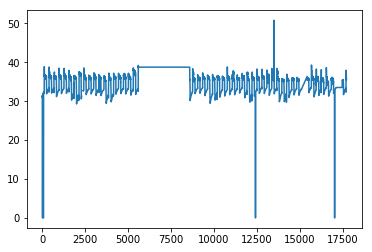

In [35]:
data['CWRT_syth'].plot()

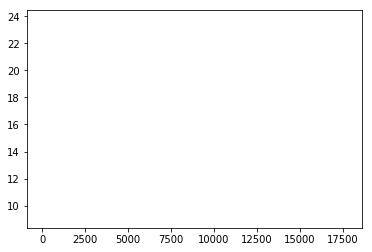

In [37]:
data['HLI Entering CHW Temp'].plot()